In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Task A - Accuracy:", accuracy)
print("Task A - Confusion Matrix:\n", cm)

Task A - Accuracy: 0.7640449438202247
Task A - Confusion Matrix:
 [[91 20]
 [22 45]]


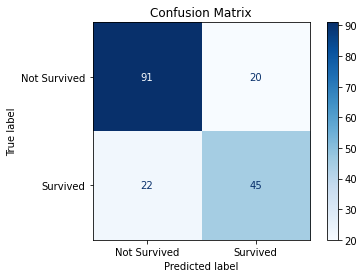

In [5]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=["Not Survived", "Survived"], 
                                        cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [6]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                               n_iter=10, cv=3, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)
best_model = rf_random.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("Best Model Accuracy (Task A):", best_accuracy)

Best Model Accuracy (Task A): 0.797752808988764


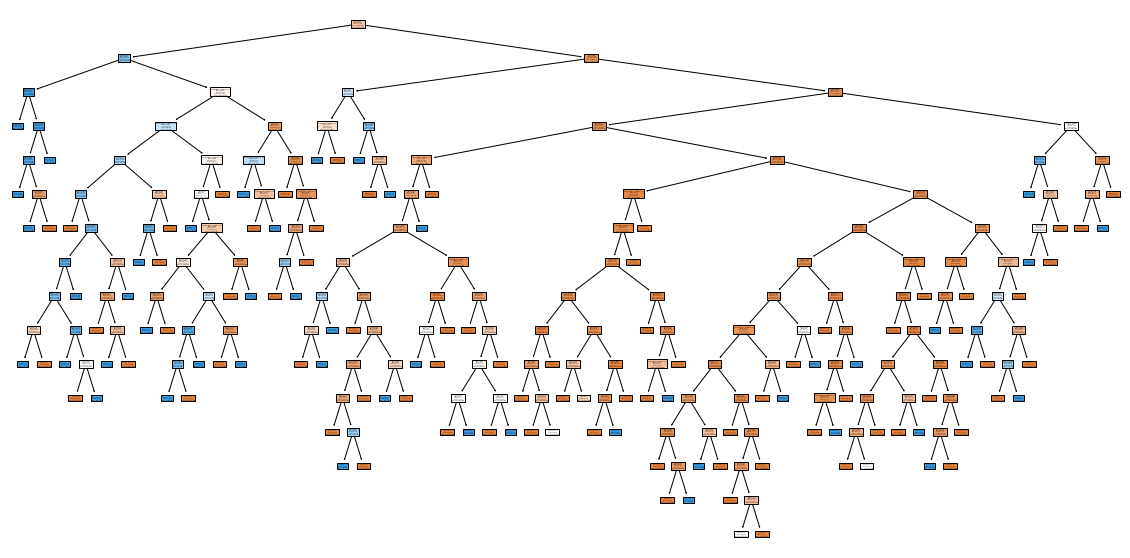

In [7]:
plt.figure(figsize=(20, 10))
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Pclass', 'Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy with Normalization:", accuracy)

Accuracy with Normalization: 0.7677902621722846


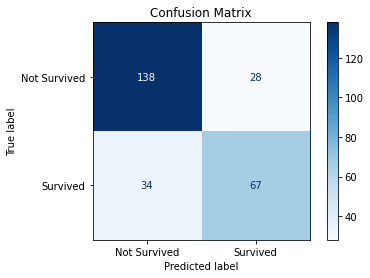

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=["Not Survived", "Survived"], 
                                        cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [12]:
rf_model = pipeline.named_steps['classifier']
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                               n_iter=10, cv=3, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)
best_model = rf_random.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("Model Accuracy with Normalization (Task B):", best_accuracy)

Model Accuracy with Normalization (Task B): 0.8202247191011236


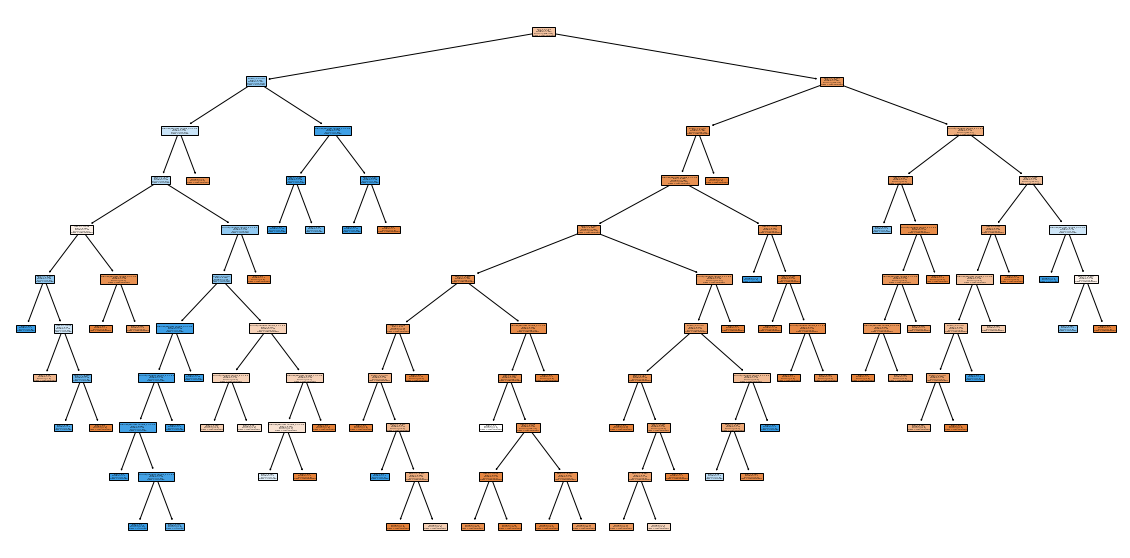

In [13]:
encoded_features = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['Pclass', 'Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])

final_feature_names = ['Age', 'Fare'] + list(encoded_features)

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model.named_steps['classifier'].estimators_[0], feature_names=final_feature_names, class_names=["Not Survived", "Survived"], filled=True)
plt.show()